# Imports

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from typing import List, Tuple

# Class define

In [8]:
class Building():
    def __init__(self, pos: Tuple[int], size: int, color: str, r: float):
        self.pos = pos
        self.x, self.y = pos[0], pos[1]
        self.size = size
        self.color = color
        self.r = r
        self.linewidth=1.5

    def graph(self):
        # Contours
        self.ax.plot([self.x, self.x], [self.y, self.y+self.size],
                     [self.x, self.x+self.size], [self.y, self.y],
                     [self.x+self.size, self.x+self.size], [self.y, self.y+self.size],
                     [self.x, self.x+self.size], [self.y+self.size, self.y+self.size],
                     color=self.color, linewidth=self.linewidth)

        # Ranges
        self.ax.plot([self.x-self.r, self.x-self.r], [self.y, self.y+self.size],
                     [self.x, self.x+self.size], [self.y-self.r, self.y-self.r],
                     [self.x, self.x+self.size], [self.y+self.size+self.r, self.y+self.size+self.r],
                     [self.x+self.size+self.r, self.x+self.size+self.r], [self.y, self.y+self.size],
                     color='black', linewidth=self.linewidth)

        arc1 = patches.Arc(xy=self.pos, width=2*self.r, height=2*self.r,
                           theta1=180, theta2=270, linewidth=self.linewidth)
        arc2 = patches.Arc(xy=(self.x+self.size, self.y), width=2*self.r, height=2*self.r,
                           theta1=270, theta2=0, linewidth=self.linewidth)
        arc3 = patches.Arc(xy=(self.x, self.y+self.size), width=2*self.r, height=2*self.r,
                           theta1=90, theta2=180, linewidth=self.linewidth)
        arc4 = patches.Arc(xy=(self.x+self.size, self.y+self.size), width=2*self.r, height=2*self.r,
                           theta1=0, theta2=90, linewidth=self.linewidth)

        self.ax.add_patch(arc1)
        self.ax.add_patch(arc2)
        self.ax.add_patch(arc3)
        self.ax.add_patch(arc4)

In [15]:
class Village():
    def __init__(self, buildings_list: List[Building]):
        self.buildings_list = buildings_list
        self.fig, self.ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
        for building in self.buildings_list:
            building.ax = self.ax

    def graph(self):
        # Plot all the buildings
        for building in self.buildings_list:
            building.graph()

        self.ax.grid()

        minx = min(b.x-b.r for b in self.buildings_list)
        maxx = max(b.x+b.size+b.r for b in self.buildings_list)
        miny = min(b.y-b.r for b in self.buildings_list)
        maxy = max(b.y+b.size+b.r for b in self.buildings_list)
        span = max(maxx-minx, maxy-miny)
        self.ax.set_xlim((minx-1, minx+span+1))
        self.ax.set_ylim((miny-1, miny+span+1))

        self.ax.set_xticks(range(int(minx), int(minx+span+1)))
        self.ax.set_yticks(range(int(miny), int(miny+span+1)))

        self.ax.set_xticklabels([])
        self.ax.set_yticklabels([])


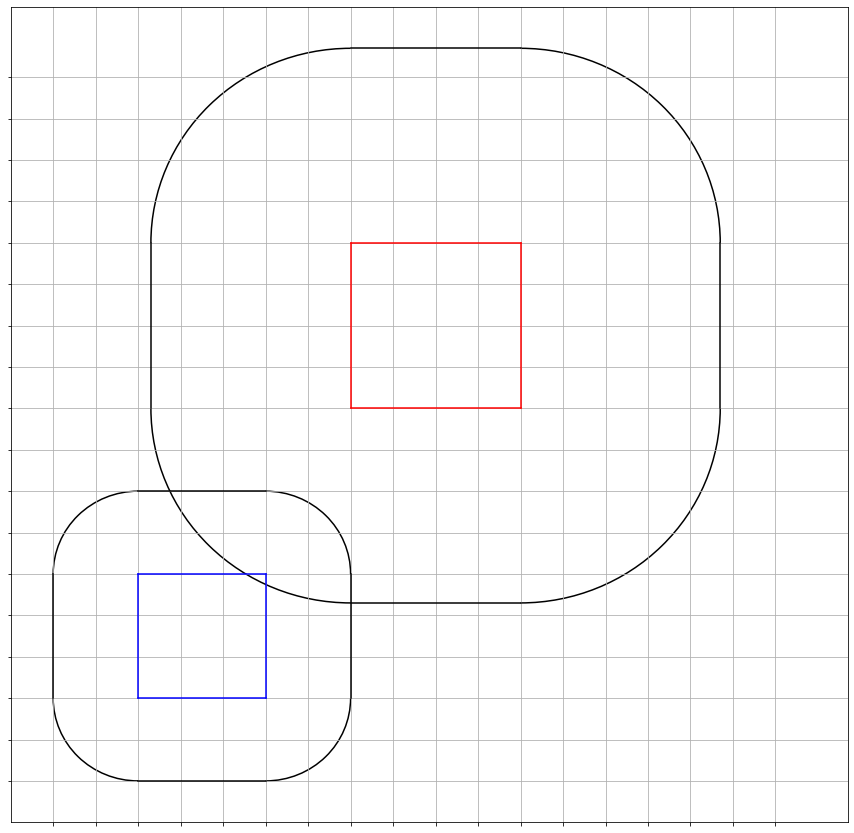

In [16]:
tour1 = Building(pos=(0, 0), size=3, color='blue', r=2)
tour2 = Building(pos=(5, 7), size=4, color='red', r=4.7)

village1 = Village(buildings_list=[tour1, tour2])

village1.graph()